#### Import all the required libraries

In [3]:
import joblib
import pandas as pd 
from scipy.sparse import load_npz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [ ]:
# Load the target variable [y]
y_train = joblib.load('../model/y_train.joblib')
y_test = joblib.load('../model/y_test.joblib')

In [4]:
# Load the feature matrices [X]
X_train_vectorized = load_npz('../model/X_train_vectorized.npz')
X_test_vectorized = load_npz('../model/X_test_vectorized.npz')

In [5]:
vectorizer = joblib.load('../model/vectorizer.joblib')

In [6]:
print("All data successfully loaded into the new notebook.")
print(f"Loaded X_train shape: {X_train_vectorized.shape}")
print(f"Loaded y_train shape: {y_train.shape}")

All data successfully loaded into the new notebook.
Loaded X_train shape: (144303, 2672)
Loaded y_train shape: (144303,)


In [8]:
classes = np.unique(y_train)
weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, weights))
print(class_weight_dict)

{'negative': np.float64(2.464064340966139), 'neutral': np.float64(6.827679205110007), 'positive': np.float64(0.4085461664557446)}


In [9]:
class_weights_dict = {
    'negative': 2.464064340966139, 
    'neutral': 6.827679205110007, 
    'positive': 0.4085461664557446
}
lr_classifier = LogisticRegression(
    solver='liblinear',         
    max_iter=1000,                
    random_state=44, 
    class_weight=class_weights_dict 
)

print("Starting model training...")
# Fit the model to the vectorized training data
lr_classifier.fit(X_train_vectorized, y_train)
print("Model training complete.")

Starting model training...


d:\Sentiment_Analyzer\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Model training complete.


In [10]:
y_pred = lr_classifier.predict(X_test_vectorized)
print(f"\nOverall Accuracy: {accuracy_score(y_test, y_pred)}")


Overall Accuracy: 0.8871271759618583


In [11]:
print("\n-- Classification Report ")
print(classification_report(y_test, y_pred))


-- Classification Report 
              precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4880
     neutral       0.22      0.27      0.24      1762
    positive       0.94      0.95      0.94     29434

    accuracy                           0.89     36076
   macro avg       0.67      0.66      0.66     36076
weighted avg       0.89      0.89      0.89     36076



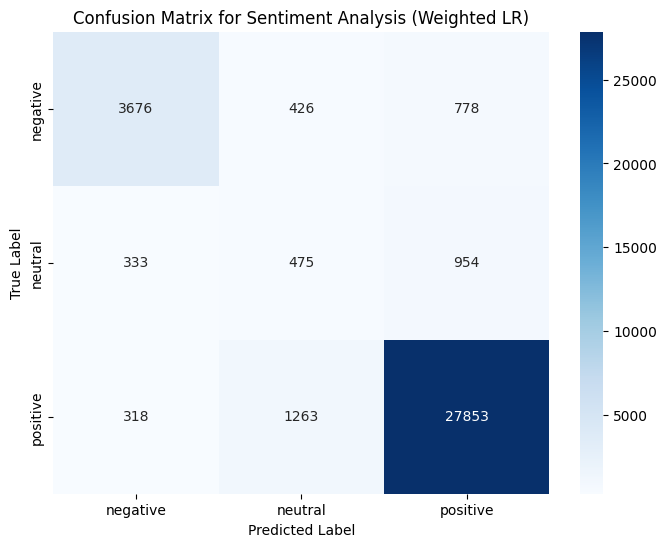

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes) 

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=classes, 
    yticklabels=classes
)
plt.title('Confusion Matrix for Sentiment Analysis (Weighted LR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Benchmark Model Comparison

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize model without class_weight
lr_unweighted = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=44
)
lr_unweighted.fit(X_train_vectorized, y_train)
y_pred_unweighted = lr_unweighted.predict(X_test_vectorized)

print("\n--- Benchmark Model (UNWEIGHTED) ---")
print(classification_report(y_test, y_pred_unweighted))

d:\Sentiment_Analyzer\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



--- Benchmark Model (UNWEIGHTED) ---


d:\Sentiment_Analyzer\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4880
     neutral       0.00      0.00      0.00      1762
    positive       0.92      0.99      0.95     29434

    accuracy                           0.91     36076
   macro avg       0.59      0.58      0.58     36076
weighted avg       0.86      0.91      0.88     36076



d:\Sentiment_Analyzer\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Sentiment_Analyzer\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


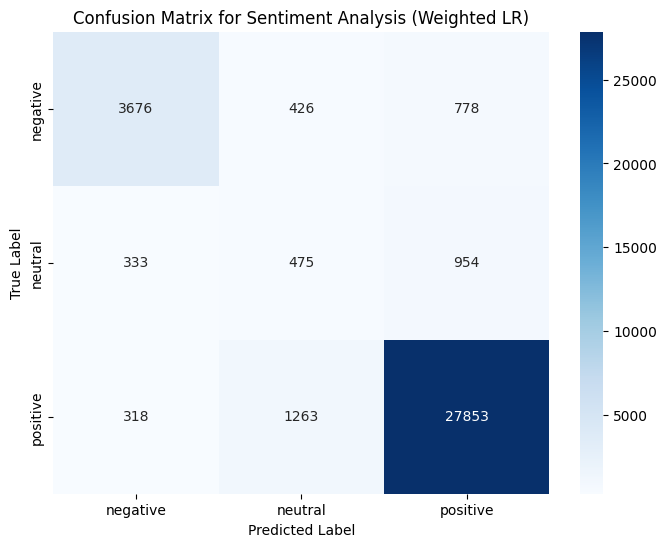

In [16]:
# Confusion Matrix Visualization
classes = np.unique(y_test) 
cm = confusion_matrix(y_test, y_pred, labels=classes) 

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=classes, 
    yticklabels=classes
)
plt.title('Confusion Matrix for Sentiment Analysis (Weighted LR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show() 

#### Save the model

In [17]:
joblib.dump(lr_classifier, '../model/sentiment_classifier_weighted_lr.joblib')
print("Final model saved successfully. Ready for deployment/presentation.")

Final model saved successfully. Ready for deployment/presentation.
